# ***OUTLIER HANDLING***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *an outlier is a data point that differs significantly from other observations*

Outliers are the different ones. In a distribution, if few of the datapoints have distinguishable characters compared to its counterparts, then it is termed as an outlier. Suppose in a dataset of students' performance, 98% of the students scored below 60 but only 2% scored above 85. In this example, these 2% students are outliers.

In a machine learning problem, outliers create a loss of mess. Your accuracy might dip significantly if there are unhandled outliers in the dataset. So it is always recommended to find out the outliers and do something about them before you proceed on to model building.

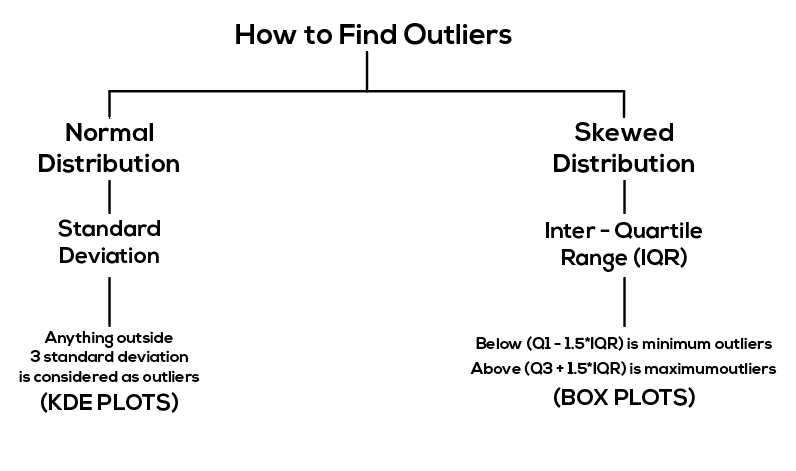

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

In [4]:
df_normal = pd.read_csv("C:/Users/91799/OneDrive/Desktop/python basics/Machine Learning-Supervised Algorithm/water_potability.csv", usecols=["Sulfate"])
print(df_normal)
df_skew = pd.read_csv("C:/Users/91799/OneDrive/Desktop/python basics/titanic.csv", usecols=["Fare"])
print(df_skew)

         Sulfate
0     368.516441
1            NaN
2            NaN
3     356.886136
4     310.135738
...          ...
3271  359.948574
3272         NaN
3273         NaN
3274         NaN
3275         NaN

[3276 rows x 1 columns]
        Fare
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
..       ...
886  13.0000
887  30.0000
888  23.4500
889  30.0000
890   7.7500

[891 rows x 1 columns]


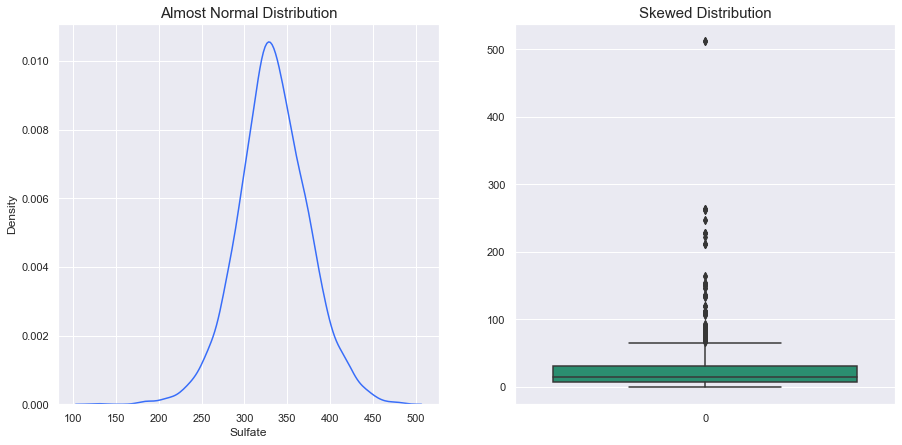

In [3]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = df_normal["Sulfate"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df_skew["Fare"], palette="Dark2")
plt.show()

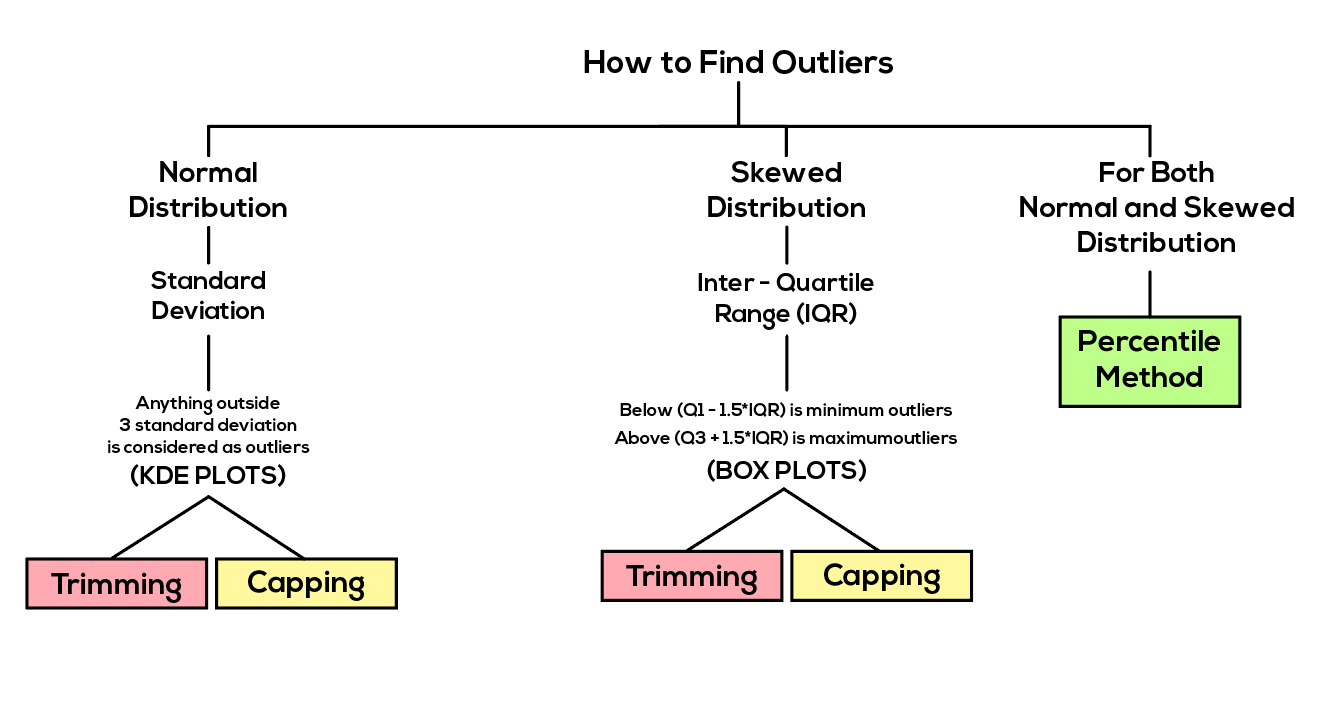

1. Trimming is the method of cutting off or getting rid of the outliers at the end of the dataset. This is easier than all the other methods.
2. Capping is setting a limit for the feature and set the value of all the outliers exceeding the limit to the value of the limit. So in the student example, we will set a limit of score and change the score of the 2% student to that. For example, 75 is the max score limit that we set. The score of 2% outlier students will be set to 75.
3. Percentile method is equal percentile on both the sides to detect outliers. Once you detect these outliers you can use either trimming or capping to get rid of them.

# 1. Trimming & Standard Deviation❤

In [5]:
#defining lower and upper limit
norm_upper_limit = df_normal["Sulfate"].mean() + 3 * df_normal["Sulfate"].std()
norm_lower_limit = df_normal["Sulfate"].mean() - 3 * df_normal["Sulfate"].std()

In [6]:
norm_upper_limit

458.02629799583167

In [7]:
norm_lower_limit

209.5252552257954

In [8]:
#trimming the outliers away and we only have the distribution in 3 standard deviation
df_normal_new = df_normal[(df_normal["Sulfate"] > norm_lower_limit) & (df_normal["Sulfate"] < norm_upper_limit)]

In [17]:
df_normal_new

,Sulfate
0,368.516441
3,356.886136
4,310.135738
5,326.678363
6,393.663396
...,...
3267,312.931022
3268,304.510230
3269,258.930600
3270,345.700257


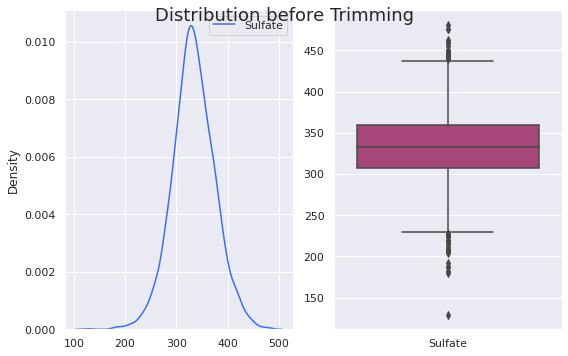

In [9]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal)
plt.subplot(1,2,2)
sns.boxplot(data = df_normal, palette="magma")
plt.tight_layout()
plt.show()

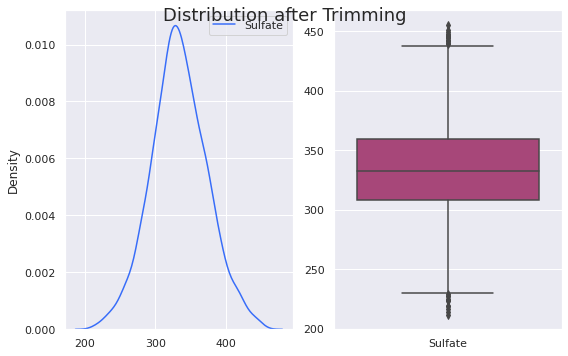

In [10]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal_new)
plt.subplot(1,2,2)
sns.boxplot(data = df_normal_new, palette="magma")
plt.tight_layout()
plt.show()

See how the distribution did not get effected in this method. Also, we got rid of the outliers. One bad thing about this method is loss of information. We got rid of corresponding feature information which might have been useful in some way for the model. However, just like dropping nun values, this method might result to loss of information.

# **2. Capping & Inter-Quartile Range (IQR)**

In [11]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_skew["Fare"].quantile(0.25)
q2 = df_skew["Fare"].quantile(0.75)

In [18]:
q1

7.9104

In [12]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1

In [13]:
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

In [14]:
#capping
df_skew_new = pd.DataFrame(np.where(df_skew["Fare"] > max_limit, max_limit, 
         (np.where(df_skew["Fare"] < min_limit, min_limit, df_skew["Fare"]))), columns=["Fare"])

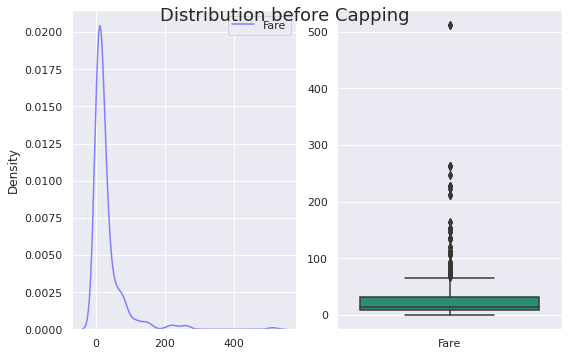

In [15]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew, palette="Dark2")
plt.tight_layout()
plt.show()


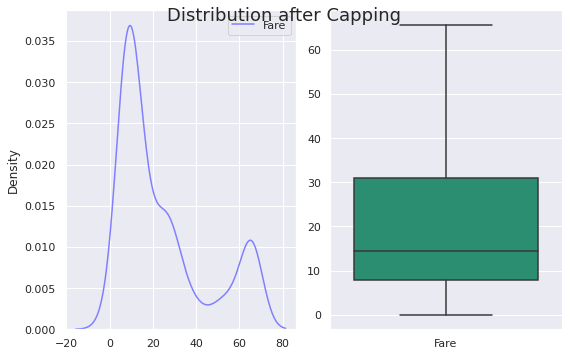

In [16]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_skew_new, palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = df_skew_new, palette="Dark2")
plt.tight_layout()
plt.show()

Notice how we got rid of the outliers. Also, as the outlier values were replaced by the max and min limit, notice, how in the PDF or KDEplot, there is a buldge or more values near 60-80.


# ***3. Percentile Method***

In percentile method, you decide a specific threshold in percentile. So, use the same function that I have used for q1 and q2 in finding out IQR. Use that to decide a certain threshold, say for example, aynthing above 98 percentile and below 2 percentile will be considered as an outlier. Then you can go ahead and use trimming or capping to handle them. I have showed both the ways in the above examples.
Percentile method is arbitrary and you will have to find out a value manually and here domain knowledge will help you a lot. Domain knowledge is the strongest pillar in feature engineering.